In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_5.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_5.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,1.944461e-11,1.182148e-09,3.278554e-11,0.898481,1.837055e-11,2.325727e-13,0.000001,1.069728e-09,...,2.511855e-09,6.351116e-28,7.685121e-17,1.048491e-17,2.536784e-08,9.814017e-06,-7.323393e-04,4.811983e-27,3.072384e-27,1.947867e-28
1,0.000017,0.405009,7.550322e-11,2.258949e-09,1.246149e-10,0.898481,7.097908e-11,1.727776e-12,0.000002,4.276438e-09,...,5.452763e-09,3.264377e-27,1.740908e-16,3.155422e-17,3.844895e-08,1.001687e-05,-7.325115e-04,3.403418e-26,2.152887e-26,1.418211e-27
2,0.000025,0.405009,1.649693e-10,3.240123e-09,2.664686e-10,0.898481,1.542155e-10,5.614833e-12,0.000003,9.618955e-09,...,9.355355e-09,1.042275e-26,3.116401e-16,6.865601e-17,5.179823e-08,1.022047e-05,-7.326857e-04,1.348856e-25,8.676196e-26,5.780986e-27
3,0.000033,0.405009,2.848541e-10,4.134731e-09,4.502424e-10,0.898481,2.646294e-10,1.292576e-11,0.000004,1.709562e-08,...,1.411486e-08,2.549276e-26,4.903260e-16,1.248453e-16,6.541584e-08,1.042346e-05,-7.328614e-04,3.882838e-25,2.558949e-25,1.709738e-26
4,0.000042,0.405009,4.324704e-10,4.950932e-09,6.689169e-10,0.898481,3.990518e-10,2.456852e-11,0.000005,2.670480e-08,...,1.963843e-08,5.234622e-26,7.109736e-16,2.025200e-16,7.930023e-08,1.062470e-05,-7.330380e-04,9.123099e-25,6.183391e-25,4.125330e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.967931,4.654815e-01,6.757738e-01,9.090612e-01,0.168626,1.005907e+00,8.297101e-01,0.049854,4.019877e-02,...,2.633335e-21,5.765844e-23,8.871021e-24,1.164808e-26,3.040462e-28,2.020000e-30,1.311491e-32,1.388409e-21,2.960396e-22,2.796689e-23
119995,0.999967,0.967931,4.654815e-01,6.757738e-01,9.090612e-01,0.168626,1.005907e+00,8.297101e-01,0.049854,4.019877e-02,...,2.824446e-21,5.795235e-23,9.111992e-24,1.175131e-26,3.056396e-28,1.983525e-30,1.387013e-32,1.393830e-21,2.935525e-22,2.732811e-23
119996,0.999975,0.967931,4.654815e-01,6.757738e-01,9.090612e-01,0.168626,1.005907e+00,8.297101e-01,0.049854,4.019877e-02,...,2.698695e-21,5.330711e-23,9.111900e-24,1.167892e-26,2.992709e-28,2.076608e-30,1.237903e-32,1.359254e-21,2.964565e-22,2.794539e-23
119997,0.999983,0.967931,4.654815e-01,6.757738e-01,9.090612e-01,0.168626,1.005907e+00,8.297101e-01,0.049854,4.019877e-02,...,2.579971e-21,5.584662e-23,8.840741e-24,1.179785e-26,3.075442e-28,1.998748e-30,1.531136e-32,1.451650e-21,2.928341e-22,2.735407e-23


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

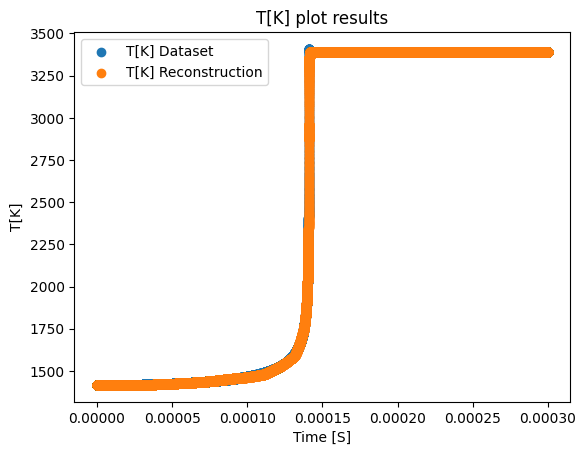

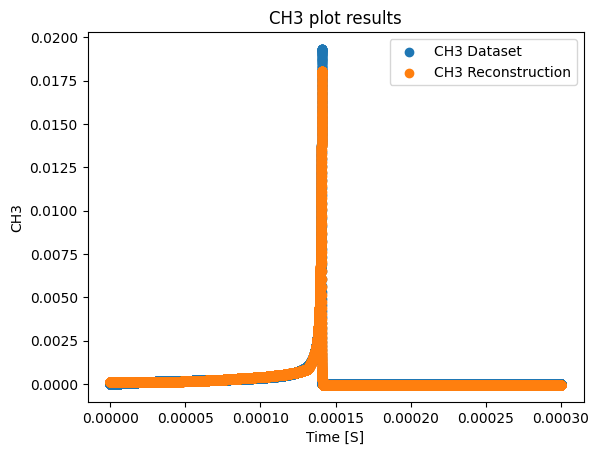

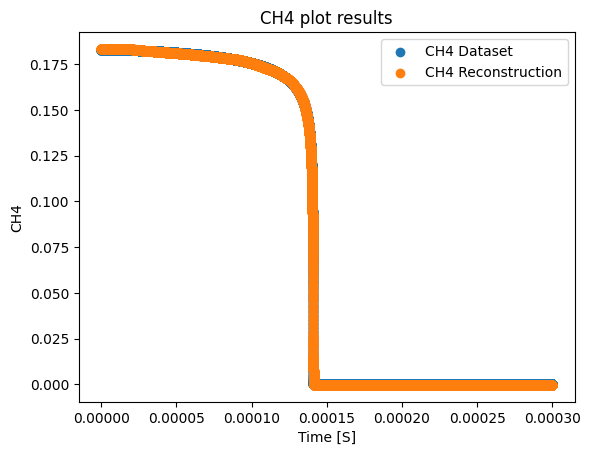

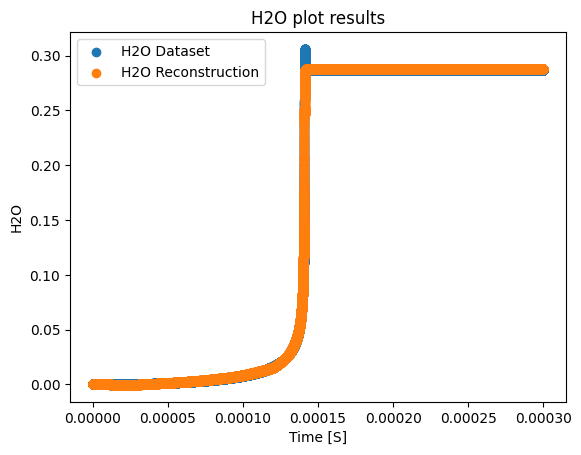

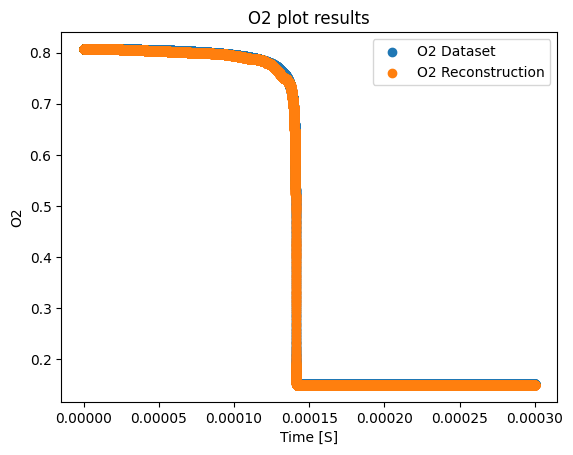

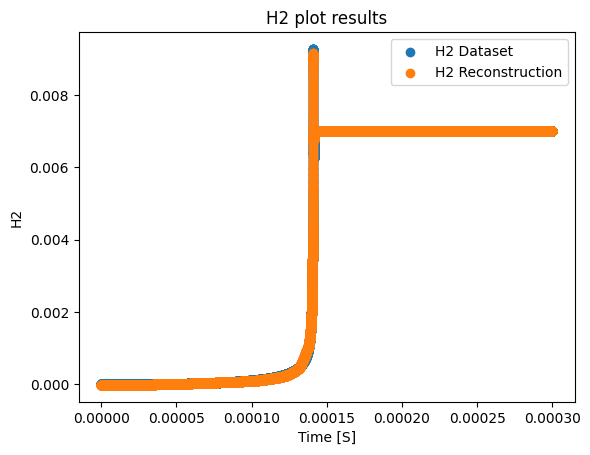

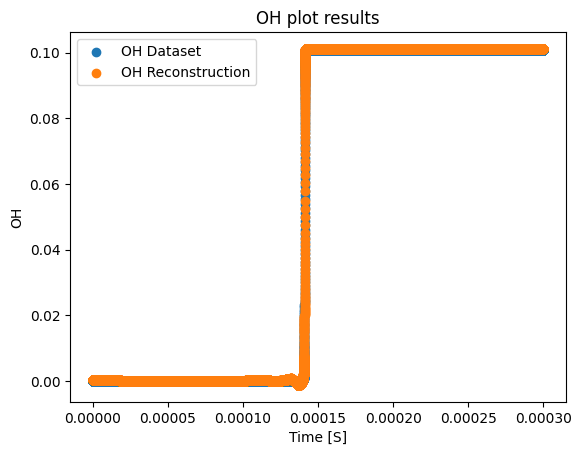

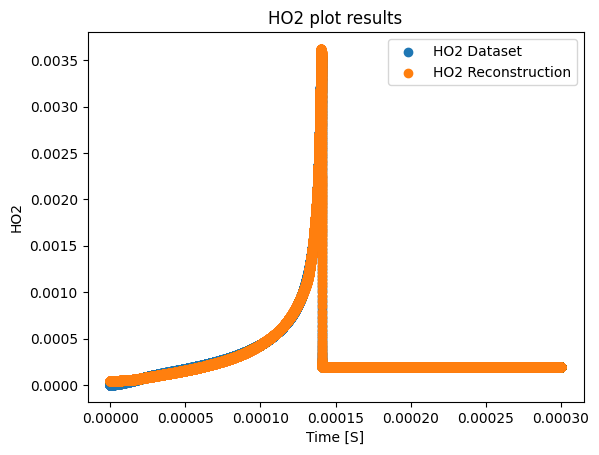

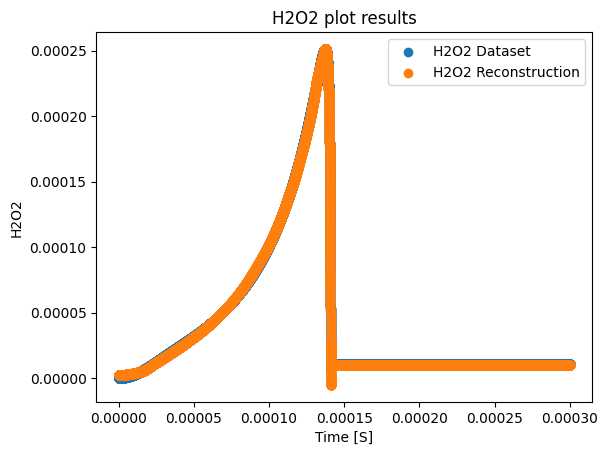

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

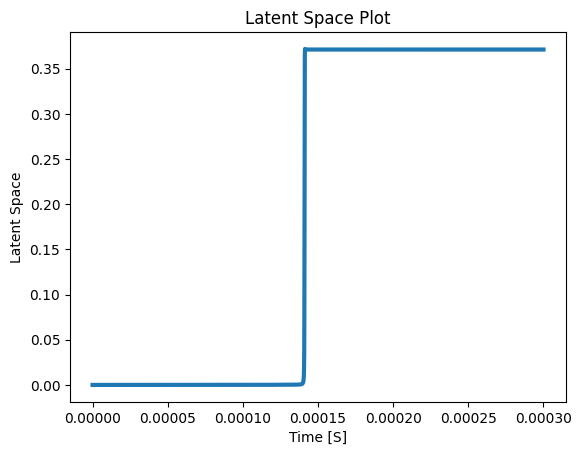

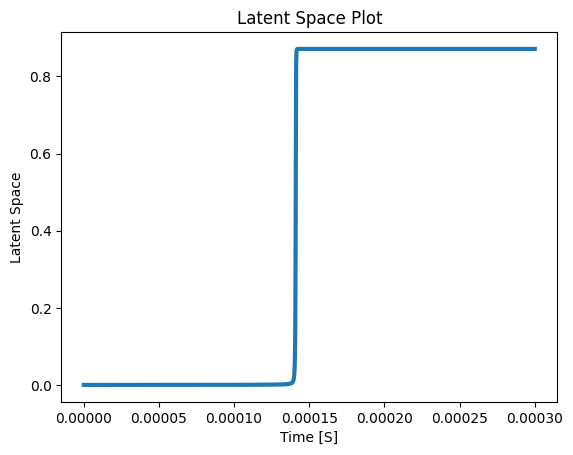

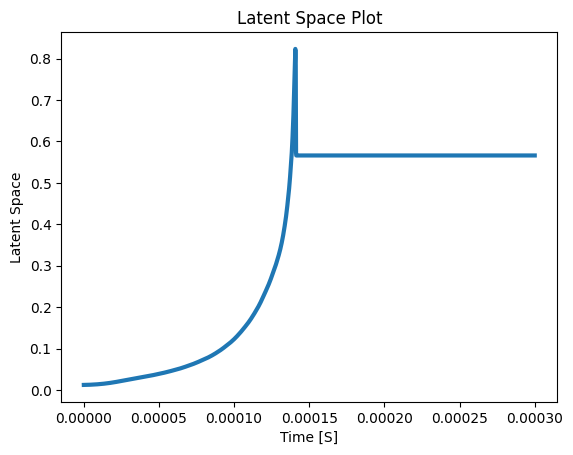

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,1.944461e-11,1.182148e-09,3.278554e-11,0.898481,1.837055e-11,2.325727e-13,0.000001,1.069728e-09,1.567912e-35,...,6.511399e-10,3.829963e-29,1.909047e-17,1.622693e-18,1.255290e-08,9.613464e-06,-7.321697e-04,1.673772e-28,1.184680e-28,6.587406e-30
1,0.405009,7.550322e-11,2.258949e-09,1.246149e-10,0.898481,7.097908e-11,1.727776e-12,0.000002,4.276438e-09,7.459768e-34,...,2.511855e-09,6.351116e-28,7.685121e-17,1.048491e-17,2.536784e-08,9.814017e-06,-7.323393e-04,4.811983e-27,3.072384e-27,1.947867e-28
2,0.405009,1.649693e-10,3.240123e-09,2.664686e-10,0.898481,1.542155e-10,5.614833e-12,0.000003,9.618955e-09,6.088953e-33,...,5.452763e-09,3.264377e-27,1.740908e-16,3.155422e-17,3.844895e-08,1.001687e-05,-7.325115e-04,3.403418e-26,2.152887e-26,1.418211e-27
3,0.405009,2.848541e-10,4.134731e-09,4.502424e-10,0.898481,2.646294e-10,1.292576e-11,0.000004,1.709562e-08,-3.686460e-31,...,9.355355e-09,1.042275e-26,3.116401e-16,6.865601e-17,5.179823e-08,1.022047e-05,-7.326857e-04,1.348856e-25,8.676196e-26,5.780986e-27
4,0.405009,4.324704e-10,4.950932e-09,6.689169e-10,0.898481,3.990518e-10,2.456852e-11,0.000005,2.670480e-08,-7.575749e-32,...,1.411486e-08,2.549276e-26,4.903260e-16,1.248453e-16,6.541584e-08,1.042346e-05,-7.328614e-04,3.882838e-25,2.558949e-25,1.709738e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.967931,4.654815e-01,6.757738e-01,9.090612e-01,0.168626,1.005907e+00,8.297101e-01,0.049854,4.019877e-02,9.366597e-07,...,3.097603e-21,5.691948e-23,9.019275e-24,1.166081e-26,3.137990e-28,2.009679e-30,1.287052e-32,1.405590e-21,2.979339e-22,2.657499e-23
119995,0.967931,4.654815e-01,6.757738e-01,9.090612e-01,0.168626,1.005907e+00,8.297101e-01,0.049854,4.019877e-02,9.366597e-07,...,2.633335e-21,5.765844e-23,8.871021e-24,1.164808e-26,3.040462e-28,2.020000e-30,1.311491e-32,1.388409e-21,2.960396e-22,2.796689e-23
119996,0.967931,4.654815e-01,6.757738e-01,9.090612e-01,0.168626,1.005907e+00,8.297101e-01,0.049854,4.019877e-02,9.366597e-07,...,2.824446e-21,5.795235e-23,9.111992e-24,1.175131e-26,3.056396e-28,1.983525e-30,1.387013e-32,1.393830e-21,2.935525e-22,2.732811e-23
119997,0.967931,4.654815e-01,6.757738e-01,9.090612e-01,0.168626,1.005907e+00,8.297101e-01,0.049854,4.019877e-02,9.366597e-07,...,2.698695e-21,5.330711e-23,9.111900e-24,1.167892e-26,2.992709e-28,2.076608e-30,1.237903e-32,1.359254e-21,2.964565e-22,2.794539e-23


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.856057,0.807669,0.809595,0.809480,-0.857637,0.857074,0.859678,0.153335,-0.167775,0.853383,...,-0.345925,-0.345629,-0.346601,-0.346285,-0.345741,-0.389530,-0.093490,-0.345946,-0.346232,-0.346164
1,0.809045,0.858217,0.860147,0.860025,-0.819118,0.819817,0.812674,0.104755,-0.119304,0.806368,...,-0.297830,-0.297534,-0.298510,-0.298848,-0.298511,-0.341733,-0.045233,-0.297854,-0.298140,-0.298071
2,0.783057,0.838113,0.836183,0.836065,-0.788644,0.789341,0.787338,0.126919,-0.095572,0.793615,...,-0.291678,-0.273639,-0.275753,-0.275888,-0.284935,-0.320534,-0.067473,-0.274078,-0.274527,-0.274622


H2O     0.859678
OH      0.857074
CO2     0.856391
T[K]    0.856057
C       0.853383
Name: 0, dtype: float64
H      0.860147
O      0.860025
H2     0.858217
CO     0.851663
CO2    0.820361
Name: 1, dtype: float64
H2    0.838113
H     0.836183
O     0.836065
CO    0.834195
C     0.793615
Name: 2, dtype: float64


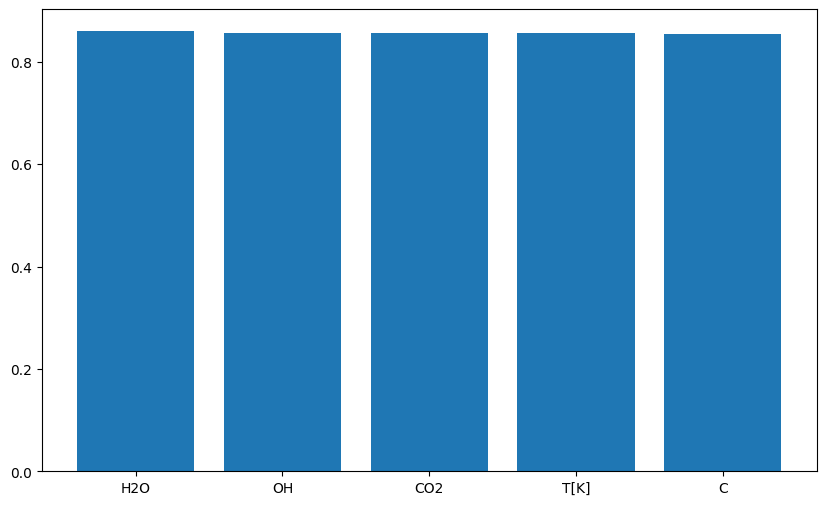

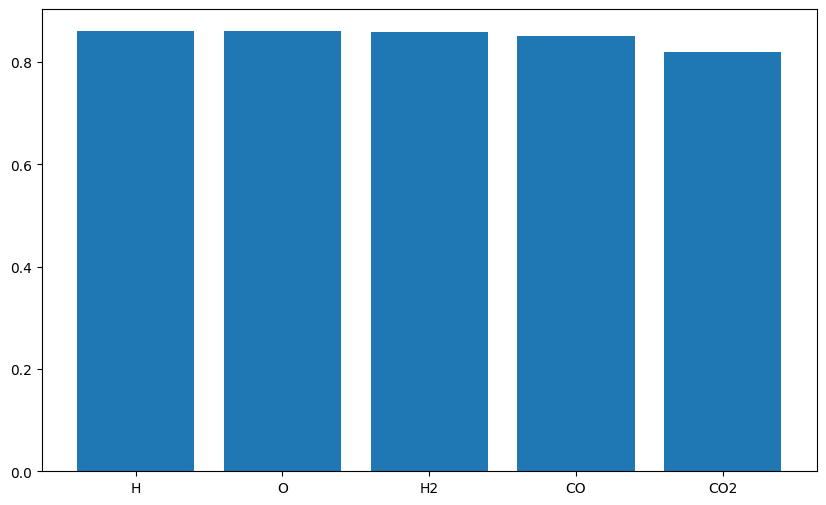

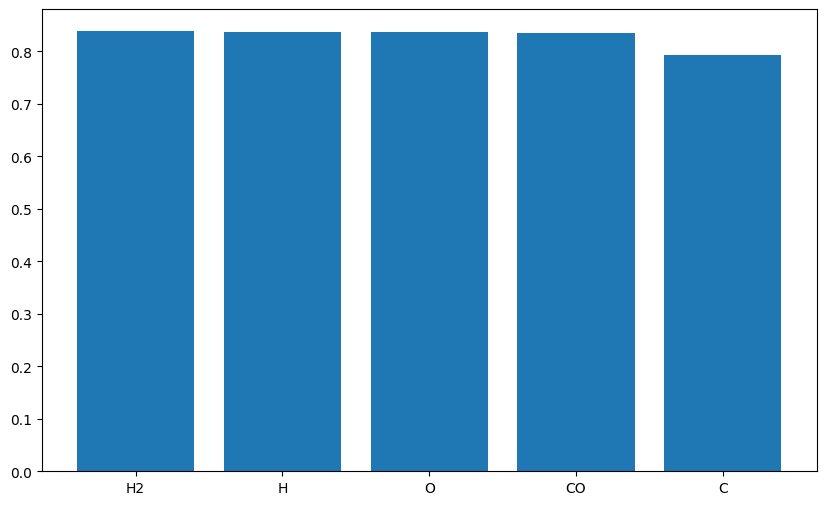

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.930948,0.893426,0.894842,0.894842,-0.929416,0.928955,0.930904,0.130428,-0.356776,0.926261,...,-0.706523,-0.705873,-0.707862,-0.707639,-0.706819,-0.715344,-0.163327,-0.706513,-0.707093,-0.706961
1,0.897115,0.929786,0.931204,0.931203,-0.901783,0.902245,0.897073,0.095418,-0.322128,0.892424,...,-0.672381,-0.671671,-0.673723,-0.673978,-0.673307,-0.681363,-0.128703,-0.672332,-0.672929,-0.672793
2,0.877825,0.914718,0.913269,0.913269,-0.879209,0.879671,0.878271,0.130044,-0.283582,0.883032,...,-0.649980,-0.624346,-0.627954,-0.627927,-0.640373,-0.637858,-0.156008,-0.625166,-0.625982,-0.626074


T[K]    0.930948
H2O     0.930904
OH      0.928955
CO2     0.928508
C       0.926261
Name: 0, dtype: float64
H      0.931204
O      0.931203
H2     0.929786
CO     0.925087
CO2    0.902692
Name: 1, dtype: float64
H2    0.914718
H     0.913269
O     0.913269
CO    0.911931
C     0.883032
Name: 2, dtype: float64


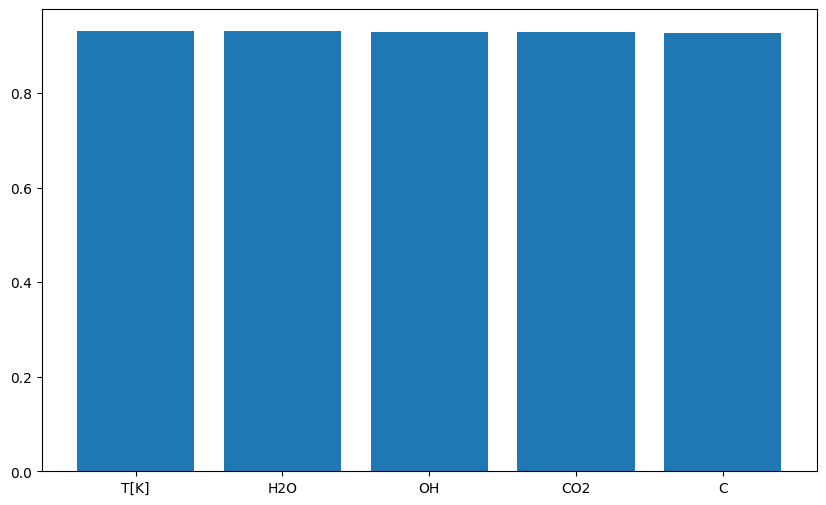

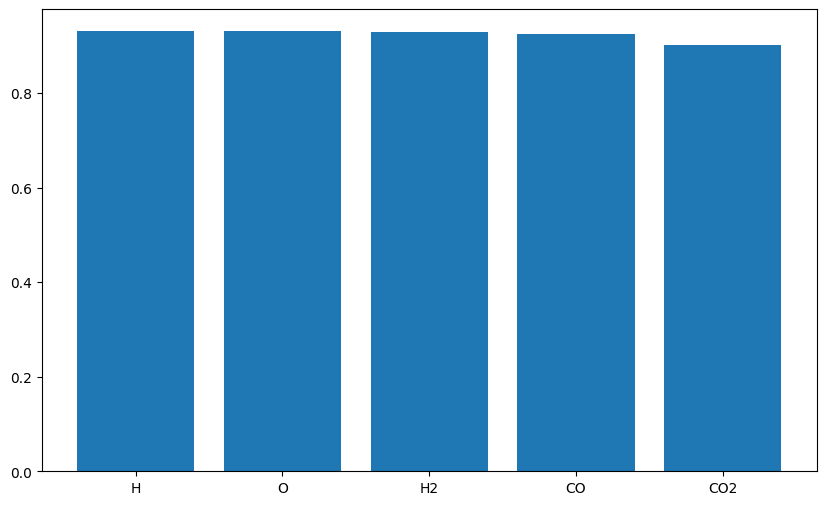

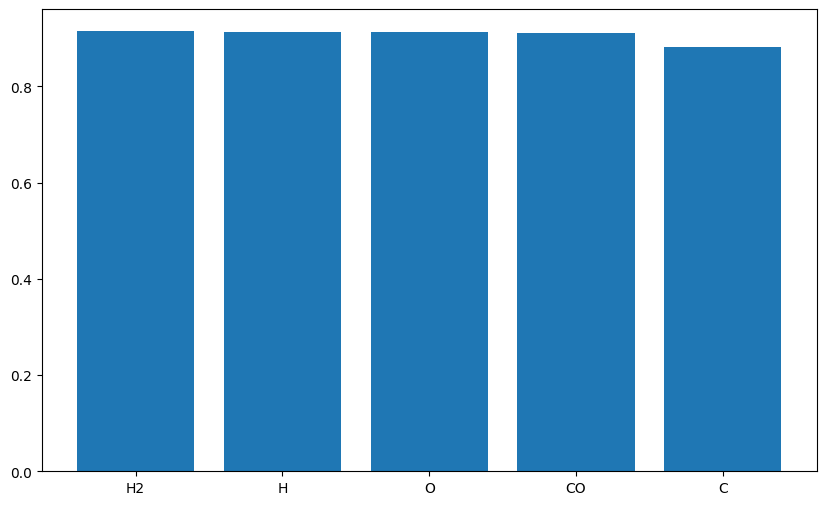

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.856040,0.807672,0.809597,0.809483,-0.857659,0.857097,0.859660,0.153307,-0.167786,0.853365,...,-0.345918,-0.345637,-0.346594,-0.346278,-0.345734,-0.389523,-0.093495,-0.345954,-0.346240,-0.346171
1,0.809035,0.858224,0.860153,0.860032,-0.819105,0.819804,0.812662,0.104729,-0.119316,0.806355,...,-0.297825,-0.297544,-0.298505,-0.298844,-0.298506,-0.341730,-0.045239,-0.297864,-0.298150,-0.298081
2,0.783082,0.838116,0.836186,0.836068,-0.788627,0.789323,0.787361,0.126891,-0.095624,0.793638,...,-0.291712,-0.273687,-0.275787,-0.275922,-0.284969,-0.320568,-0.067478,-0.274126,-0.274576,-0.274670


H2O     0.859660
OH      0.857097
CO2     0.856413
T[K]    0.856040
C       0.853365
Name: 0, dtype: float64
H      0.860153
O      0.860032
H2     0.858224
CO     0.851670
CO2    0.820349
Name: 1, dtype: float64
H2    0.838116
H     0.836186
O     0.836068
CO    0.834238
C     0.793638
Name: 2, dtype: float64


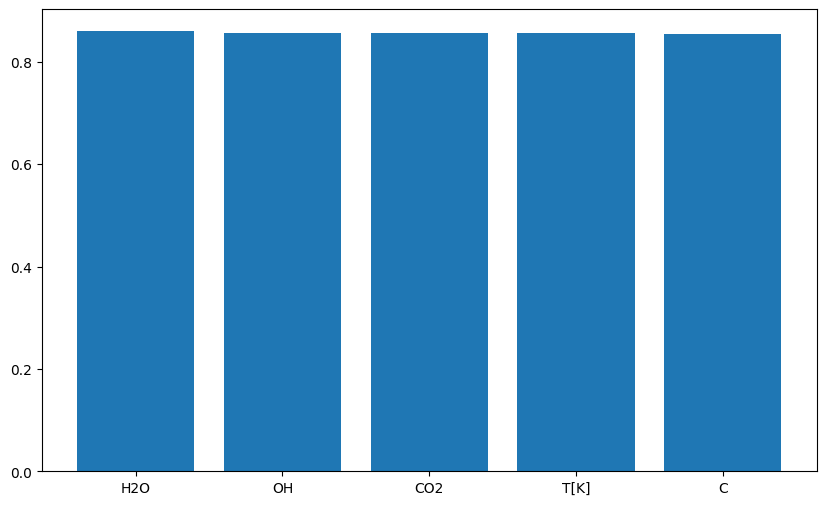

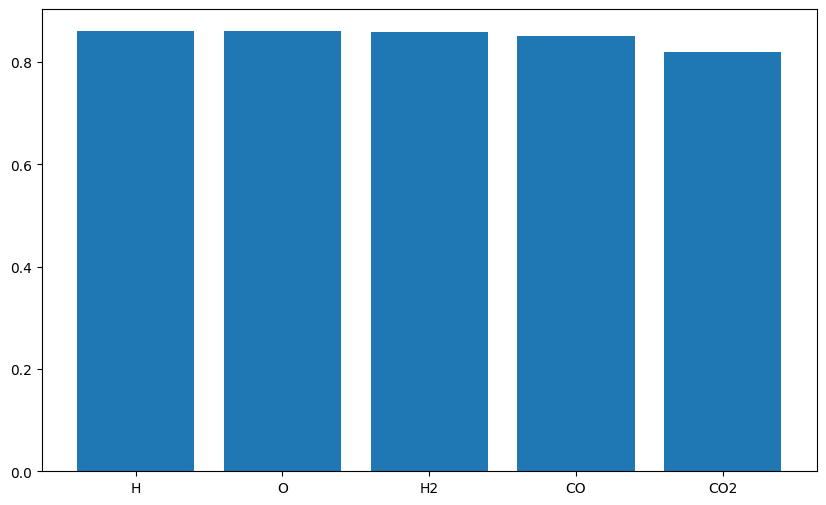

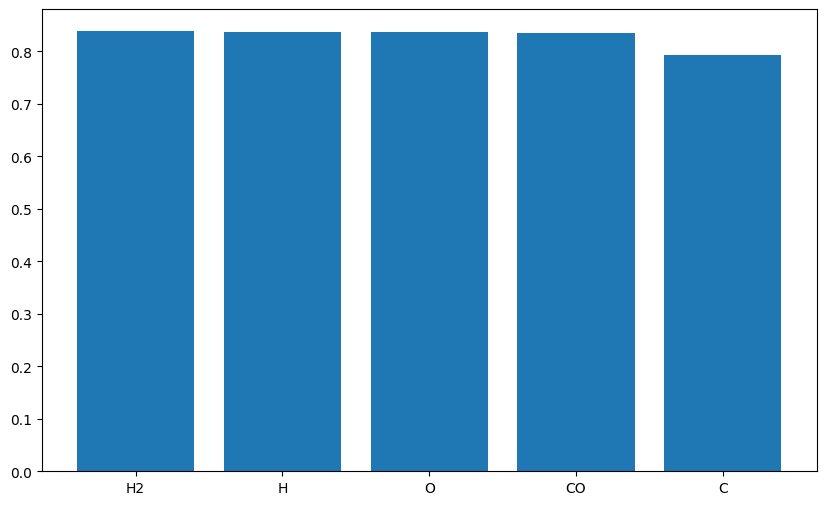

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)